<a href="https://colab.research.google.com/github/GutemaB2015/Gutema-thesis/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Classiffier Accuracy: 0.965
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      0.91      0.95       234
           2       0.80      1.00      0.89        83

    accuracy                           0.96       600
   macro avg       0.93      0.97      0.95       600
weighted avg       0.97      0.96      0.97       600

Macro Precision: 0.9326923076923078
Macro Recall: 0.9700854700854701
Macro F1 Score: 0.9469068896625155
Random Forest Classifier Accuracy: 0.9666666666666667
Macro Precision: 0.9352750809061489
Macro Recall: 0.9715099715099714
Macro F1 Score: 0.9492767537122376
Naive Bayes's  Algorithm Accuracy:  0.9233333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       1.00      0.91      0.96       234
           2       0.81      1.00      0.89        83

    accuracy                           0.9

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.9633333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       283
           1       0.96      0.94      0.95       234
           2       0.95      0.92      0.93        83

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.96      0.96      0.96       600

Macro Precision: 0.9602219017864296
Macro Recall: 0.950766673956252
Macro F1 Score: 0.9552552850072188
SVM Classifier Accuracy: 0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       283
           1       0.98      0.98      0.98       234
           2       0.96      0.93      0.94        83

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600

Macro Precision: 0.9748088982269

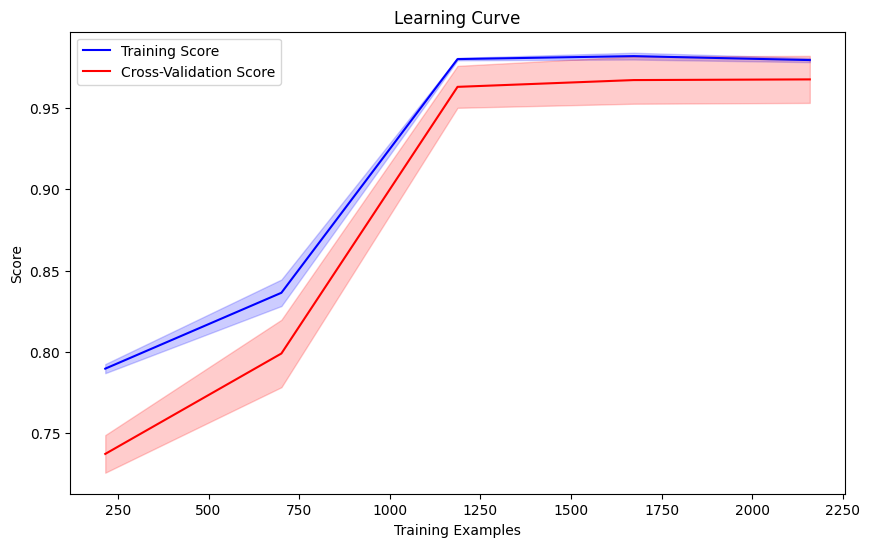

In [2]:
#list of imported libraries.
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

# DatasetUrl
DatasetUrl = 'https://raw.githubusercontent.com/GutemaB2015/Gutema-thesis/main/FillDataset.csv'
data = pd.read_csv(DatasetUrl)



# Extraxt the features you want to base the foundation of our model training
features = ['Max_Packet_Length','Fwd_Packet_Length_Max','Flow_Packets_Sec','Flow_Bytes_Sec','Packet_Length_Std','Packet_Length_Variance','Flow_IAT_Max'
           ,'Fwd_IAT_Max','Subflow_Fwd_Bytes','Fwd_Packet_Length_Std','Bwd_Packets_Sec','min_seg_size_forward','Init_Win_bytes_backward','Average_Packet_Size'
           ,'Packet_Length_Mean','Fwd_IAT_Total','Flow_IAT_Std','Fwd_IAT_Std','Avg_Fwd_Segment_Size','Fwd_Packet_Length_Mean','Fwd_Header_Length'
           ,'Fwd_IAT_Mean','Flow_IAT_Mean','Idle_Max','Idle_Mean','Fwd_Packets_Sec','Active_Std','Active_Max','Active_Min']


label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Label'].fillna(data['Label'].median(), inplace=True)
AttackLabel = data["Label"]

data = data.drop("Total_Length_of_Bwd_Packets", axis=1)
data = data.drop("Fwd_Packet_Length_Min", axis=1)
data = data.drop("Bwd_Packet_Length_Max", axis=1)
data = data.drop("Bwd_Packet_Length_Min", axis=1)
data = data.drop("Bwd_Packet_Length_Mean", axis=1)
data = data.drop("Bwd_Packet_Length_Std", axis=1)
data = data.drop("Flow_IAT_Min", axis=1)
data = data.drop("Fwd_IAT_Min", axis=1)

data = data.drop("Bwd_IAT_Total", axis=1)
data = data.drop("Bwd_IAT_Mean", axis=1)
data = data.drop("Bwd_IAT_Std", axis=1)
data = data.drop("Bwd_IAT_Max", axis=1)
data = data.drop("Bwd_IAT_Min", axis=1)
data = data.drop("Bwd_Header_Length", axis=1)
data = data.drop("Min_Packet_Length", axis=1)
data = data.drop("SYN_Flag_Count", axis=1)
data = data.drop("Down_Up_Ratio", axis=1)
data = data.drop("Avg_Bwd_Segment_Size", axis=1)
data = data.drop("Subflow_Fwd_Packets", axis=1)
data = data.drop("Subflow_Bwd_Packets", axis=1)
data = data.drop("Subflow_Bwd_Bytes", axis=1)
data = data.drop("Init_Win_bytes_forward", axis=1)
data = data.drop("act_data_pkt_fwd", axis=1)
data = data.drop("Active_Mean", axis=1)
data = data.drop("Idle_Std", axis=1)
data = data.drop("Idle_Min", axis=1)



# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)
data['Active_Std'].fillna(data['Active_Std'].median(), inplace=True)
data['Active_Max'].fillna(data['Active_Max'].median(), inplace=True)
data['Active_Min'].fillna(data['Active_Min'].median(), inplace=True)
data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)
data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)
data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)
data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)





# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], AttackLabel, test_size=0.2, random_state=1)


#DEscision Tree Accuracy
dectreClassifier = DecisionTreeClassifier(criterion="entropy",min_samples_split=2,max_depth=2,min_samples_leaf=5)
dectreClassifier = dectreClassifier.fit(X_train,y_train)
y_pred = dectreClassifier.predict(X_test)
print("Decision Tree Classiffier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_split=20, max_features=10)
rmfClassifier.fit(X_train, y_train)
y_pred = rmfClassifier.predict(X_test)
rmfClassifieraccuracy = rmfClassifier.score(X_test, y_test)
print('Random Forest Classifier Accuracy:', rmfClassifieraccuracy)

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# create gaussian naive bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,y_train)
naiveBayesPreddiction = naiveBayes.predict(X_test)
print("Naive Bayes's  Algorithm Accuracy: ",metrics.accuracy_score(y_test,naiveBayesPreddiction))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


#K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_train, y_train)
predictions = knClassifier.predict(X_test)
print('K-Nearest Neighbour Accuracy:', knClassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# Logistic Regression algorithm
logRegression = LogisticRegression(penalty='l2', C=1.0,max_iter=400)
logRegression.fit(X_train, y_train)
y_pred = logRegression.predict(X_test)
print("Logistic Regression algorithm Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)

# Create an SVM classifier
svmClassifier = SVC(kernel='rbf', C = 450)
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
print("SVM Classifier Accuracy:", svmClassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)



# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(svmClassifier, X_train, y_train, cv=10)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='red')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()






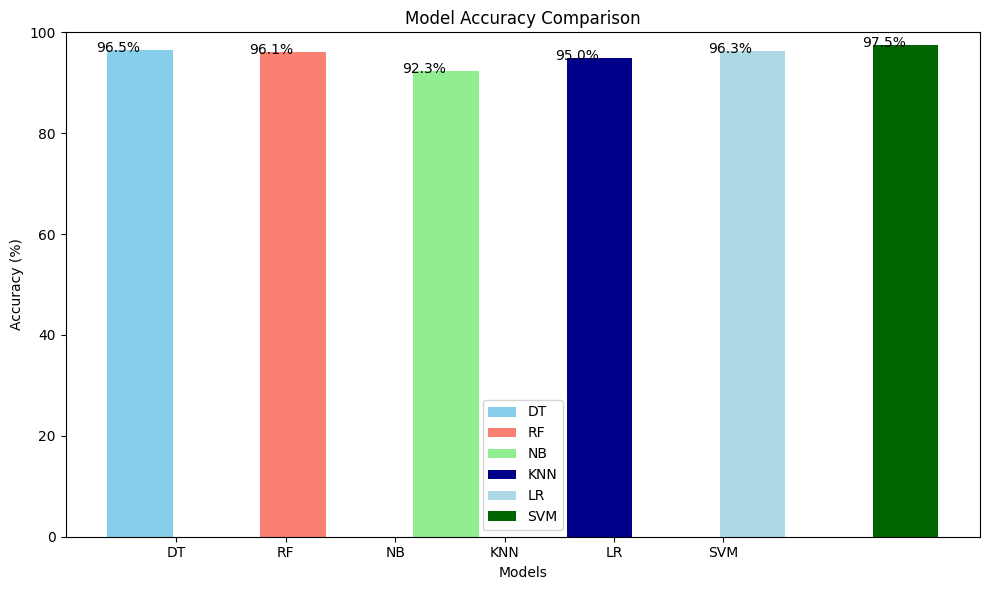

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy values (replace these with your actual data)
model_names = ["DT", "RF", "NB", "KNN", "LR", "SVM"]
accuracy_values = [96.5, 96.1, 92.3, 95.0, 96.3, 97.8]

# Custom colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'darkblue', 'lightblue', 'darkgreen']

# Define the width of each bar and the gap between bars
bar_width = 0.6  # Adjust the bar width as needed
gap = 0.4  # Adjust the gap between bars as needed

# Create a bar chart with reduced gap between bars
plt.figure(figsize=(10, 6))  # Adjust the figure size to reduce the gap
indices = np.arange(len(model_names))

for i, (name, acc) in enumerate(zip(model_names, accuracy_values)):
    plt.bar(indices[i] + gap * i, acc, color=colors[i], label=name, width=bar_width)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set the y-axis range (0% to 100% for accuracy)

# Adjust the x-axis positions and labels
plt.xticks(indices + gap * (len(model_names) - 1) / 6, model_names)

# Display the accuracy values (with percentage format) on top of each bar
for i, acc in enumerate(accuracy_values):
    plt.text(indices[i] + gap * i, acc - 1, f'{acc}%', ha='right', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()